In [65]:
import numpy as np
import pandas as pd
import pickle

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import (roc_curve,auc,accuracy_score)
from sklearn.ensemble import RandomForestClassifier

import os.path
import random

In [66]:
error_array = []

In [67]:
#日本ETFコード一覧読み込み
df = pd.read_csv("importETF.csv",encoding="utf8")

for code in df["code"]:
    print(code)
    
    path = "importETF/" + str(code) + ".csv"
    
    if os.path.exists(path):
        temp_df = pd.read_csv(path,engine = "python" ,encoding="utf8")
    else:
        error_array.append(code)
        continue
        
    new_df = pd.DataFrame()
    new_df["Date"] = temp_df["Date"]
    
    #始値
    new_df["Open"] = 0
    
    for dateIndex in temp_df.index:
        
        #当日の始値
        openValue = temp_df.at[dateIndex,"Open"]
        
        new_df.at[dateIndex,"High"] = temp_df.at[dateIndex,"High"] - openValue
        new_df.at[dateIndex,"Low"] = temp_df.at[dateIndex,"Low"] - openValue
        new_df.at[dateIndex,"Close"] = temp_df.at[dateIndex,"Close"] - openValue
        
        if dateIndex != 0:
            new_df.at[dateIndex,"Volume"] = temp_df.at[dateIndex,"Volume"] - temp_df.at[dateIndex-1,"Volume"]
            new_df.at[dateIndex,"Open"] = openValue - temp_df.at[dateIndex-1,"Close"]
            
        else:
            new_df.at[0,"Volume"] = 0
    
    #csvファイル書き出し
    new_df.to_csv("StockDataDif/" + str(code) + "_dif.csv")

1305
1306
1308
1309
1310
1311
1312
1313
1319
1320
1321
1322
1323
1324
1325
1326
1327
1328
1329
1330
1343
1344
1345
1346
1348
1349
1356
1357
1358
1360
1364
1365
1366
1367
1368
1369
1385
1386
1387
1388
1389
1390
1391
1392
1393
1394
1397
1398
1399
1456
1457
1458
1459
1460
1464
1465
1466
1467
1468
1469
1470
1471
1472
1473
1474
1475
1476
1477
1478
1479
1480
1481
1482
1483
1484
1485
1486
1487
1488
1489
1490
1492
1493
1494
1495
1496
1497
1498
1499
1540
1541
1542
1543
1545
1546
1547
1550
1551
1552
1554
1555
1557
1559
1560
1563
1566
1567
1568
1569
1570
1571
1572
1573
1574
1575
1576
1577
1578
1579
1580
1584
1585
1586
1591
1592
1593
1595
1596
1597
1598
1599
1610
1612
1613
1615
1617
1618
1619
1620
1621
1622
1623
1624
1625
1626
1627
1628
1629
1630
1631
1632
1633
1634
1635
1636
1637
1638
1639
1640
1641
1642
1643
1644
1645
1646
1647
1648
1649
1650
1651
1652
1653
1654
1655
1656
1657
1658
1659
1660
1670
1671
1672
1673
1674
1675
1676
1677
1678
1679
1680
1681
1682
1683
1684
1685
1686
1687
1688
1689
1690


In [127]:
ETF_df = pd.DataFrame()

startDate = "2002/01/01"
#indexにstartDateを持たない列はさっさと消す

df = pd.read_csv("importETF.csv",encoding="utf8")

for code in df["code"]:
    
    if code not in error_array:
        code = str(code)
        
        temp = pd.DataFrame()
        temp = pd.read_csv("StockDataDif/" + code + "_dif.csv",encoding="utf8")
        
        #startDateより前の日付のデータを持たないcodeは飛ばす
        if temp[temp['Date'] <= startDate].empty:
            continue
        
        if code == "1305":
            #初回のみETF_dfにindexを設定
            ETF_df["Date"] = temp["Date"]
            ETF_df = ETF_df[ETF_df["Date"] > startDate]
            ETF_df = ETF_df.set_index("Date")
            
        if code =="1321":
            for dateIndex in range(0,len(temp.index)-1):
                tempDate = temp.at[dateIndex,"Date"]
                
                if tempDate <= startDate:
                    continue
                    
                tempClose = temp.at[dateIndex+1,"Close"]
                if tempClose >= 20:
                    ETF_df.at[tempDate,"nextDay_HighLow"] = 1
                elif tempClose >= 0:
                    ETF_df.at[tempDate,"nextDay_HighLow"] = 0
                elif tempClose > -20:
                    ETF_df.at[tempDate,"nextDay_HighLow"] = 0
                else:
                    ETF_df.at[tempDate,"nextDay_HighLow"] = -1
                    
        for dateIndex in temp.index:
            tempDate = temp.at[dateIndex,"Date"]
            
            if tempDate <= startDate:
                continue
                
            ETF_df.at[tempDate,code + "Open"] = temp.at[dateIndex,"Open"]
            ETF_df.at[tempDate,code + "High"] = temp.at[dateIndex,"High"]
            ETF_df.at[tempDate,code + "Low"] = temp.at[dateIndex,"Low"]
            ETF_df.at[tempDate,code + "Close"] = temp.at[dateIndex,"Close"]
            ETF_df.at[tempDate,code + "Volume"] = temp.at[dateIndex,"Volume"]/10000
            

In [128]:
ETF_df

,1305Open,1305High,1305Low,1305Close,1305Volume,1306Open,1306High,1306Low,1306Close,1306Volume,...,1613Open,1613High,1613Low,1613Close,1613Volume,1615Open,1615High,1615Low,1615Close,1615Volume
Date,,,,,,,,,,,,,,,,,,,,,
2003-01-06,18.0,3.0,-1.0,-1.0,0.450,18.0,6.0,0.0,0.0,19.860,...,20.0,0.0,0.0,0.0,-0.050,-5.0,6.0,0.0,4.0,-6.71
2003-01-07,13.0,2.0,-15.0,-15.0,2.830,10.0,5.0,-13.0,-13.0,20.820,...,-20.0,2.0,0.0,2.0,0.060,2.0,0.0,-3.0,0.0,0.54
2003-01-08,-4.0,0.0,-10.0,-10.0,4.530,-7.0,1.0,-9.0,-6.0,-3.380,...,-15.0,8.0,-1.0,-1.0,0.090,-5.0,2.0,-2.0,-2.0,7.60
2003-01-09,-8.0,3.0,-2.0,0.0,-10.550,-9.0,6.0,-3.0,6.0,11.680,...,-19.0,9.0,-7.0,-1.0,0.300,-3.0,6.0,-1.0,0.0,-0.71
2003-01-10,8.0,0.0,-10.0,-9.0,11.080,10.0,0.0,-18.0,-10.0,65.670,...,3.0,4.0,-20.0,4.0,-0.030,0.0,3.0,0.0,2.0,-0.34
2003-01-14,1.0,12.0,0.0,12.0,13.290,3.0,5.0,-4.0,5.0,-70.920,...,10.0,6.0,-1.0,6.0,-0.120,-1.0,3.0,0.0,3.0,-5.63
2003-01-15,6.0,2.0,-8.0,2.0,-18.380,6.0,2.0,-10.0,2.0,12.840,...,-8.0,9.0,0.0,7.0,0.290,-3.0,7.0,0.0,7.0,7.45
2003-01-16,-2.0,4.0,-1.0,2.0,-1.940,-6.0,7.0,0.0,4.0,28.250,...,-1.0,5.0,0.0,5.0,-0.550,-1.0,5.0,-3.0,2.0,3.08
2003-01-17,-2.0,10.0,0.0,7.0,-2.980,-4.0,14.0,0.0,11.0,29.320,...,5.0,36.0,0.0,36.0,0.360,-1.0,3.0,-1.0,2.0,4.54


In [129]:
ETF_df = ETF_df.drop(ETF_df.columns[ETF_df.iloc[0].isnull()],axis=1)

In [130]:
len(ETF_df.columns)

56

In [131]:
Y = pd.DataFrame(ETF_df[ETF_df["nextDay_HighLow"]!=0]["nextDay_HighLow"])

ETF_df = ETF_df[ETF_df["nextDay_HighLow"]!=0].drop("nextDay_HighLow",axis=1)
X = ETF_df

In [132]:
X = X.fillna(0)
Y = Y.fillna(0)

In [ ]:
estimators = 1000

variable_num = 40

if os.path.exists("max_accuracy.sav"):
    max_accuracy = pickle.load(open("max_accuracy.sav","rb"))
else:
    max_accuracy = 0
    
print(max_accuracy)


for n in range(1,101):
    print(str(n) + "回目")
    
    N_train = int(len(X.index) * 0.8)
    N_test = len(X.index) - N_train
    
    X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=N_test,shuffle = False)
    
    clf = RandomForestClassifier(random_state=0,n_estimators=estimators)
    clf = clf.fit(X_train,list(y_train["nextDay_HighLow"]))
    
    #予想と制度評価
    pred = clf.predict(X_test)
    fpr,tpr,thresholds = roc_curve(y_test,pred,pos_label=1)
    auc(fpr,tpr)
    accuracy = accuracy_score(pred,y_test)
    
    #最高精度の情報を保存
    if accuracy >= max_accuracy:
        print("★精度更新★")
        
        max_accuracy = accuracy
        
        #モデル保存
        pickle.dump(accuracy,open("max_accuracy.sav","wb"))
        pickle.dump(clf,open("max_clf.sav","wb"))
        pickle.dump(X.columns,open("max_Xcolumns.sav","wb"))
        
    print(accuracy)
    
    #特徴量ランキングの作成
    features = X.columns
    importances = clf.feature_importances_
    indices = np.argsort(importances)
    
    if features[indices][0] == 0:
        #特徴量が0の説明変数が存在する場合、0のものはすべて削除
        temp = []
        for i in range(len(features[indices])):
            if importances[indices][i] == 0:
                temp.append(features[indices][i])
                
        for i in temp:
            X = X.drop(i,axis=1)
        printt("説明変数削除")
    else:
        #それ以外の場合、特徴量の小さい順に説明変数を削除して説明変数の数をvariable_num以下にする
        count = 0
        while len(X.columns) +2  > variable_num:
            X = X.drop(features[indices][count],axis=1)
            count += 1
            
        #ランダムに説明変数を1つ追加する
        while len(X.columns) <= variable_num:
            temp = random.randrange(len(ETF_df.columns))
            add_column = ETF_df.columns[temp]
            
            #既存のものとかぶらないように追加
            if add_column not in list(X.columns):
                X[add_column] = ETF_df[add_column]
        print("説明変数更新")
            
    X = X.fillna(0)
    print("-------------------------")
        

0.5852272727272727
1回目
0.5381294964028777
説明変数更新
-------------------------
2回目
0.5467625899280576
説明変数更新
-------------------------
3回目
0.543884892086331
説明変数更新
-------------------------
4回目
0.5410071942446043
説明変数更新
-------------------------
5回目
0.5453237410071943
説明変数更新
-------------------------
6回目
0.5553956834532374
説明変数更新
-------------------------
7回目
0.5323741007194245
説明変数更新
-------------------------
8回目
0.539568345323741
説明変数更新
-------------------------
9回目
0.539568345323741
説明変数更新
-------------------------
10回目
0.5381294964028777
説明変数更新
-------------------------
11回目
0.5496402877697841
説明変数更新
-------------------------
12回目
0.5352517985611511
説明変数更新
-------------------------
13回目
0.5410071942446043
説明変数更新
-------------------------
14回目
0.543884892086331
説明変数更新
-------------------------
15回目
0.5366906474820143
説明変数更新
-------------------------
16回目
0.543884892086331
説明変数更新
-------------------------
17回目
0.516546762589928
説明変数更新
-------------------------
18回目
0.5237410071942447
説明変

In [135]:
max_accuracy = pickle.load(open("max_accuracy.sav","rb"))
max_accuracy

0.5852272727272727

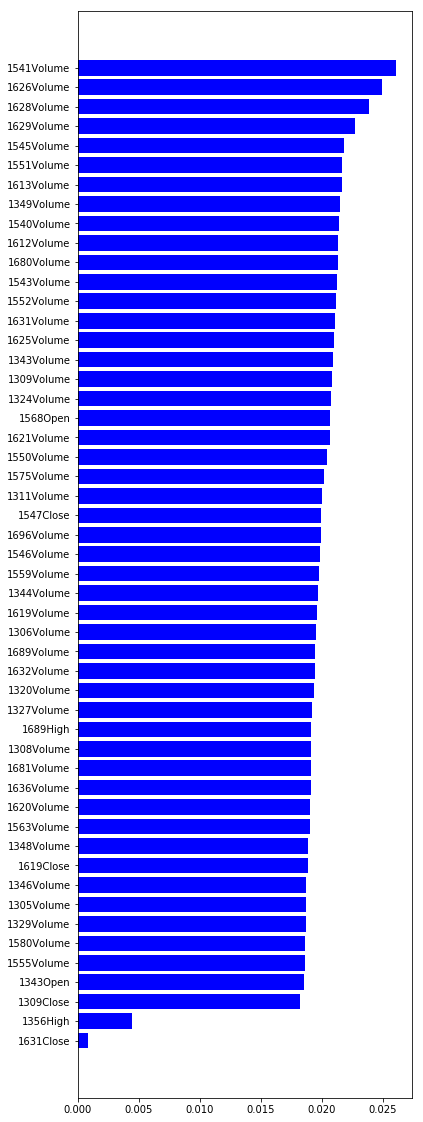

In [41]:
#特徴量確認
import matplotlib.pyplot as plt
%matplotlib inline

Xcolumns = pickle.load(open("max_Xcolumns.sav","rb"))
features = Xcolumns
importances = clf.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(6,20))
plt.barh(range(len(indices)),importances[indices],color="b",align="center")
plt.yticks(range(len(indices)),features[indices])
plt.show()